# Mini project 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(X):
    return(np.tanh(X))

def phip(X):
    return(1/((np.cosh(X))**2))

### Generate N=500 randoms points

In [3]:
X_random = np.empty((500,1), dtype = object)
N,p = X_random.shape

In [4]:
for i in range(len(X_random)):
    #X_random[i,0] = np.random.randn(3)
    #X_random[i,0] = np.random.normal(0,1,3)
    X_random[i,0] = np.random.uniform(0,1,3)
    

In [5]:
W = np.random.uniform(0,1, size=[16,1])
#W = np.ones((16,1))

In [6]:
W

array([[0.39513267],
       [0.52514757],
       [0.38317799],
       [0.83771076],
       [0.95992861],
       [0.6105534 ],
       [0.80053011],
       [0.53532663],
       [0.0471279 ],
       [0.76746626],
       [0.12652655],
       [0.97294943],
       [0.87074586],
       [0.81286453],
       [0.77868454],
       [0.83293806]])

### Gradient and Jacobean matrix

In [7]:
def gradient_wF(X,W):
    gradient = np.zeros((16,1))
    gradient[0,0] = phi(W[1,0]*X[0]+W[2,0]*X[1]+W[3,0]*X[2]+W[4,0])
    gradient[1,0] = W[0,0]*phip(W[1,0]*X[0]+W[2,0]*X[1]+W[3,0]*X[2]+W[4,0])*X[0]
    gradient[2,0] = W[0,0]*phip(W[1,0]*X[0]+W[2,0]*X[1]+W[3,0]*X[2]+W[4,0])*X[1]
    gradient[3,0] = W[0,0]*phip(W[1,0]*X[0]+W[2,0]*X[1]+W[3,0]*X[2]+W[4,0])*X[2]
    gradient[4,0] = W[0,0]*phip(W[1,0]*X[0]+W[2,0]*X[1]+W[3,0]*X[2]+W[4,0])
    gradient[5,0] = phi(W[6,0]*X[0]+W[7,0]*X[1]+W[8,0]*X[2]+W[9,0])
    gradient[6,0] = W[5,0]*phip(W[6,0]*X[0]+W[7,0]*X[1]+W[8,0]*X[2]+W[9,0])*X[0]
    gradient[7,0] = W[5,0]*phip(W[6,0]*X[0]+W[7,0]*X[1]+W[8,0]*X[2]+W[9,0])*X[1]
    gradient[8,0] = W[5,0]*phip(W[6,0]*X[0]+W[7,0]*X[1]+W[8,0]*X[2]+W[9,0])*X[2]
    gradient[9,0] = W[5,0]*phip(W[6,0]*X[0]+W[7,0]*X[1]+W[8,0]*X[2]+W[9,0])
    gradient[10,0] = phi(W[11,0]*X[0]+W[12,0]*X[1]+W[13,0]*X[2]+W[14,0])
    gradient[11,0] = W[10,0]*phip(W[11,0]*X[0]+W[12,0]*X[1]+W[13,0]*X[2]+W[14,0])*X[0]
    gradient[12,0] = W[10,0]*phip(W[11,0]*X[0]+W[12,0]*X[1]+W[13,0]*X[2]+W[14,0])*X[1]
    gradient[13,0] = W[10,0]*phip(W[11,0]*X[0]+W[12,0]*X[1]+W[13,0]*X[2]+W[14,0])*X[2]
    gradient[14,0] = W[10,0]*phip(W[11,0]*X[0]+W[12,0]*X[1]+W[13,0]*X[2]+W[14,0])
    gradient[15,0] = 1
    
    return gradient

In [8]:
def Jacobean_generator(X_random,W,lambda_):
    Jacobean = np.zeros((N+16,16))
    for i in range(N):
        gradient = gradient_wF(X_random[i,0],W)
        Jacobean[i,:] = np.transpose(gradient)
    
    for j in range(16):
        Jacobean[N+j,j] = np.sqrt(lambda_)
    return Jacobean

### F, g, R and loss function

In [9]:
def Fw(X,W):
    return (W[0,0]*phi(W[1,0]*X[0]+W[2,0]*X[1]+W[3,0]*X[2]+W[4,0])+W[5,0]*phi(W[6,0]*X[0]+W[7,0]*X[1]+W[8,0]*X[2]+W[9,0])+W[10,0]*phi(W[11,0]*X[0]+W[12,0]*X[1]+W[13,0]*X[2]+W[14,0])+W[15,0])

In [10]:
def g_1(X):
    return(X[0]*X[1]+X[2])

In [11]:
def Rn(X,W,g):
    Rn_ = np.zeros((N,1))
    for i in range(len(Rn_)):
        Rn_[i,0] = Fw(X[i,0],W) - g(X[i,0])
    
    return Rn_

In [12]:
def loss_function(Rn_, W, lambda_):
    loss = np.zeros((N+16,1))
    for i in range(N):
        loss[i,0] = Rn_[i,0]
    
    for j in range(len(W)):
        loss[N+j,0] = np.sqrt(lambda_)*W[j,0]
    
    return loss

### Levenberg-Marquard algorithm

In [13]:
def Levenberg_Marquard(X_random,W,g,lambda_,gamma, epsilon,itermax):
    W_0 = W
    Jacobean = Jacobean_generator(X_random,W_0,lambda_)
    Rn_ = Rn(X_random,W_0,g)
    loss = loss_function(Rn_,W_0,lambda_)
    i = 0
    LOSS = list()
    iter_ = list()
    while((np.linalg.norm(loss)>epsilon) and (i < itermax)):
        LOSS.append(np.linalg.norm(loss))
        iter_.append(i)
        W = W_0 - (np.linalg.inv((Jacobean.T@Jacobean)+gamma*np.eye(16))@Jacobean.T@loss)
        
        if (np.linalg.norm(loss)>np.linalg.norm(loss_function(Rn(X_random,W,g), W, lambda_))):
            W_0 = W
            gamma = 0.8*gamma
            #print("x0.8")
        else:
            gamma = 2*gamma
            #print("x2")
 
        Rn_ = Rn(X_random,W_0,g)
        Jacobean = Jacobean_generator(X_random,W_0,lambda_)
        loss = loss_function(Rn_,W_0,lambda_)
        i+=1
    
    return np.linalg.norm(loss), W, LOSS, iter_  

In [14]:
loss_, W_, lossl, iterl = Levenberg_Marquard(X_random, W, g_1, 1e-5,1, 1e-4,100)

In [15]:
loss_

0.04349160084222277

In [16]:
W_

array([[ 8.20853948e+00],
       [-1.51447321e-01],
       [ 4.84559876e-02],
       [ 1.21932496e-01],
       [-3.35500499e-04],
       [ 4.00342171e+00],
       [ 3.52633255e-01],
       [ 4.75937205e-01],
       [-8.27898014e-04],
       [-1.10242671e+00],
       [ 3.21892432e+00],
       [ 3.94233518e-01],
       [-5.33565442e-01],
       [ 2.00570081e-03],
       [ 7.43390588e-01],
       [ 1.17267589e+00]])

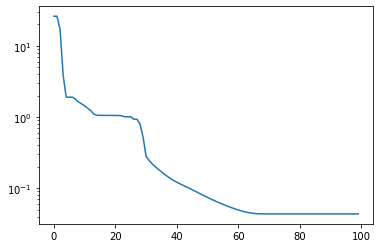

In [17]:
plt.semilogy(iterl, lossl)
plt.show()

###### Stopping creterion : 

I choose two stopping criterion : 
- The small residual like here $10^{-4}$ and allow to determine when the loss is small enough. 
- The number of maximum iteration etablish a limit of iteration. When the limit is reached the implementation is broke. 

### Variation of $\lambda$

In [18]:
Lambda = np.arange(-10,0)
Lambda

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [19]:
Loss_list = list()
for l in Lambda:
    loss_l, W_l, losslist_l, iterlist_l = Levenberg_Marquard(X_random, W, g_1, np.float32(10)**(l),1, 1e-4,100)
    Loss_list.append(loss_l)

In [20]:
Loss_list

[0.006830011547519421,
 0.02024807109866204,
 0.008041733996132647,
 0.013787035298893137,
 0.024271604139311294,
 0.04349160084222277,
 0.08040890407045964,
 0.16144988280339492,
 0.3847903902470659,
 1.0370132680093196]

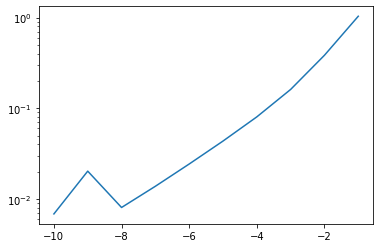

In [21]:
plt.semilogy(Lambda,Loss_list)
plt.show()

###### Loss error

Basically in the first plot we can see that loss is decreasing with iteration, until reach 0.051. That is with $\lambda = 10^{-5}$

In the second plot, we see the loss decrease depending on the choice of $\lambda$. I choose different values of $\lambda$ between $10^{-10}$ to $10^{-2}$. And we can see that the lambda is low the loss is also low

### Different initialization

In [22]:
W1 = np.random.normal(0,1, size=[16,1])
W2 = np.random.uniform(0,1, size=[16,1])
W3 = np.ones((16,1))
W4 = np.zeros((16,1))
W5 = np.random.randn(16,1)
W6 = np.random.randn(16,1)*10

In [23]:
W_list = list()
loss_1, W_1, lossl1, iterl1 = Levenberg_Marquard(X_random, W1, g_1, 1e-5,1, 1e-4,100)
W_list.append(W_1)
loss_2, W_2, lossl2, iterl2 = Levenberg_Marquard(X_random, W2, g_1, 1e-5,1, 1e-4,100)
W_list.append(W_2)
loss_3, W_3, lossl3, iterl3 = Levenberg_Marquard(X_random, W3, g_1, 1e-5,1, 1e-4,100)
W_list.append(W_3)
loss_4, W_4, lossl4, iterl4 = Levenberg_Marquard(X_random, W4, g_1, 1e-5,1, 1e-4,100)
W_list.append(W_4)
loss_5, W_5, lossl5, iterl5 = Levenberg_Marquard(X_random, W5, g_1, 1e-5,1, 1e-4,100)
W_list.append(W_5)
loss_6, W_6, lossl6, iterl6 = Levenberg_Marquard(X_random, W6, g_1, 1e-5,1, 1e-4,100)
W_list.append(W_6)

In [24]:
print(f"""-----------------------------------
W1 : 
{W1} 
loss_1 = {loss_1}

W2 : 
{W2} 
loss_2 = {loss_2}

W3 : 
{W3} 
loss_3 = {loss_3}

W4 : 
{W4} 
loss_4 = {loss_4}

W5 : 
{W5} 
loss_5 = {loss_5}

W6 : 
{W6} 
loss_6 = {loss_6}
""")

-----------------------------------
W1 : 
[[-0.22803659]
 [ 1.32668821]
 [-0.3282843 ]
 [-1.70347035]
 [ 0.32630554]
 [-1.05112372]
 [ 0.26339006]
 [ 0.56514483]
 [ 1.19175705]
 [-1.59701443]
 [-0.9177623 ]
 [ 0.46107247]
 [-0.27617663]
 [-1.74934321]
 [-0.64817201]
 [ 1.46708095]] 
loss_1 = 1.0417318227534866

W2 : 
[[0.02576787]
 [0.84594854]
 [0.83598788]
 [0.7276526 ]
 [0.1676549 ]
 [0.53457875]
 [0.3383684 ]
 [0.25367262]
 [0.98034583]
 [0.84174265]
 [0.07280753]
 [0.34570581]
 [0.13309346]
 [0.02373785]
 [0.68914101]
 [0.185327  ]] 
loss_2 = 0.04349160084222272

W3 : 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
loss_3 = 0.04264434769770211

W4 : 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 
loss_4 = 8.30133145168922

W5 : 
[[ 1.20592107]
 [-0.11409914]
 [ 0.05970475]
 [ 1.34307209]
 [ 0.61449085]
 [ 0.44720958]
 [-1.49455527]
 [-1.21805953]
 [-1.07017773]
 [-0.42866538]
 [ 1

Here I choose different way to initialize my w's. For each type of initalization I calculated the loss 

In [25]:
def error_rate(X,W, g):
    N,p = X.shape
    sum_ = 0 
    for i in range(len(X)):
        sum_ += abs(Fw(X[i,0],W) - g(X[i,0]))
        
    return sum_/N

### Testing on another set with differents $N_T$ and $\lambda$

In [26]:
size = np.arange(50,350,50)
size

array([ 50, 100, 150, 200, 250, 300])

In [27]:
error_RATE = list()
for s in range(len(size)):
    X_random_test = np.empty((size[s],1), dtype = object)
    N,p = X_random_test.shape
    for i in range(len(X_random_test)):
        X_random_test[i,0] = np.random.uniform(0,1,3)
        
    error = error_rate(X_random_test,W_,g_1)
    error_RATE.append(error)

In [28]:
error_RATE

[0.0011096522617074817,
 0.000980144209176041,
 0.0009575156724025748,
 0.0009179549097302135,
 0.0009826755899586973,
 0.0009336107082252225]

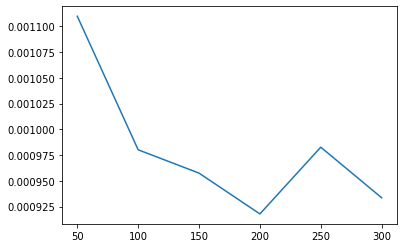

In [29]:
plt.plot(size, error_RATE)

plt.show()

I choose 6 sizes of sample from 50 to 300. For each sample I've calculated the error. According to the results we can see that the loss is really low whatever the number of samples is.

### Different $N_T$ and initializations

In [30]:
error_test_w = [[]]*6
for s in range(len(size)):
    X_random_test = np.empty((size[s],1), dtype = object)
    N,p = X_random_test.shape
    for i in range(len(X_random_test)):
        X_random_test[i,0] = np.random.uniform(0,1,3)
    error_list = list()
    for p in range(len(W_list)):
        error_ = error_rate(X_random_test,W_list[p],g_1)
        error_list.append(error_)
    error_test_w[s]=error_list

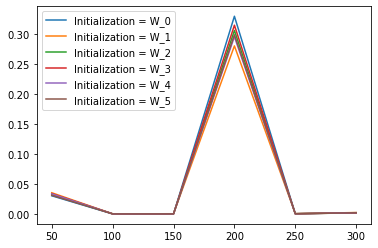

In [31]:
for p in range(len(error_test_w)):
    plt.plot(size, error_test_w[p], label=f"Initialization = W_{p}")

plt.legend()
plt.show()

For this one I just have calculated the error with the w's I get before (with different initialization). I ploted the error then for each wi in function of the size of the sample. 
We can that the error are really low. And we can see that for 200 samples there is some weird values because the error is negative. 

---

## Same work with different $g(x)$

In [32]:
def g_2(X):
    return (X[0]**2+X[1]*X[2]**2)

In [33]:
loss_g2, W_g2, lossl_g2, iterl_g2 = Levenberg_Marquard(X_random, W, g_2, 1e-5,1, 1e-4,100)

In [34]:
loss_g2

0.2289838556611885

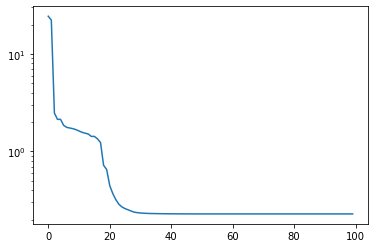

In [35]:
plt.semilogy(iterl_g2, lossl_g2)
plt.show()

### Variation of $\lambda$

In [36]:
Lambda_g2 = np.arange(-10,0)
Lambda_g2

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [37]:
Loss_list_g2 = list()
for l in Lambda_g2:
    loss_l_g2, W_l_g2, losslist_l_g2, iterlist_l_g2 = Levenberg_Marquard(X_random, W, g_2, np.float32(10)**(l),1, 1e-4,100)
    Loss_list_g2.append(loss_l_g2)

In [38]:
Loss_list_g2

[0.22679961904376908,
 0.22680423555664292,
 0.22683533769517203,
 0.22693854437272598,
 0.22731346456473694,
 0.2289838556611885,
 0.23895586575113967,
 0.3039946465314539,
 0.5862869103213042,
 1.3716848026807218]

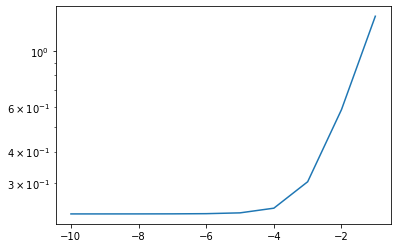

In [39]:
plt.semilogy(Lambda_g2,Loss_list_g2)
plt.show()

### Different Initialization

In [40]:
W1_g2 = np.random.normal(0,1, size=[16,1])
W2_g2 = np.random.uniform(0,1, size=[16,1])
W3_g2 = np.ones((16,1))
W4_g2 = np.zeros((16,1))
W5_g2 = np.random.randn(16,1)
W6_g2 = np.random.randn(16,1)*10

In [41]:
W_list_g2 = list()
loss_1_g2, W_1_g2, lossl1_g2, iterl1_g2 = Levenberg_Marquard(X_random, W1_g2, g_2, 1e-5,1, 1e-4,100)
W_list_g2.append(W_1_g2)
loss_2_g2, W_2_g2, lossl2_g2, iterl2_g2 = Levenberg_Marquard(X_random, W2_g2, g_2, 1e-5,1, 1e-4,100)
W_list_g2.append(W_2_g2)
loss_3_g2, W_3_g2, lossl3_g2, iterl3_g2 = Levenberg_Marquard(X_random, W3_g2, g_2, 1e-5,1, 1e-4,100)
W_list_g2.append(W_3_g2)
loss_4_g2, W_4_g2, lossl4_g2, iterl4_g2 = Levenberg_Marquard(X_random, W4_g2, g_2, 1e-5,1, 1e-4,100)
W_list_g2.append(W_4_g2)
loss_5_g2, W_5_g2, lossl5_g2, iterl5_g2 = Levenberg_Marquard(X_random, W5_g2, g_2, 1e-5,1, 1e-4,100)
W_list_g2.append(W_5_g2)
loss_6_g2, W_6_g2, lossl6_g2, iterl6_g2 = Levenberg_Marquard(X_random, W6_g2, g_2, 1e-5,1, 1e-4,100)
W_list_g2.append(W_6_g2)

In [42]:
print(f"""-----------------------------------
W1 : 
{W1_g2} 
loss_1 = {loss_1_g2}

W2 : 
{W2_g2} 
loss_2 = {loss_2_g2}

W3 : 
{W3_g2} 
loss_3 = {loss_3_g2}

W4 : 
{W4_g2} 
loss_4 = {loss_4_g2}

W5 : 
{W5_g2} 
loss_5 = {loss_5_g2}

W6 : 
{W6_g2} 
loss_6 = {loss_6_g2}
""")

-----------------------------------
W1 : 
[[-0.19081994]
 [ 2.34007192]
 [ 0.47507645]
 [ 0.91781936]
 [ 1.89732249]
 [-0.82773291]
 [-0.18877768]
 [-0.4906877 ]
 [-1.1949522 ]
 [-0.21630349]
 [ 0.43608056]
 [ 0.60360443]
 [ 0.47059095]
 [ 0.26039326]
 [ 0.91727353]
 [-0.70158712]] 
loss_1 = 1.5002389351039012

W2 : 
[[0.89695801]
 [0.74981075]
 [0.57649079]
 [0.40745497]
 [0.6071126 ]
 [0.51536303]
 [0.81401825]
 [0.19114183]
 [0.27086211]
 [0.71647405]
 [0.54175376]
 [0.58654762]
 [0.12514912]
 [0.27358172]
 [0.09067016]
 [0.96874161]] 
loss_2 = 0.11988099784516593

W3 : 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
loss_3 = 0.4327379681733449

W4 : 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 
loss_4 = 6.00261689762794

W5 : 
[[ 0.43664711]
 [ 2.22180578]
 [-0.16874912]
 [-0.20203923]
 [-1.06651047]
 [-0.08576777]
 [ 1.94059219]
 [-0.61292674]
 [ 0.98058893]
 [ 1.51565292]
 [ 0.

### Testing on another set with differents $N_T$ and $\lambda$

In [43]:
size = np.arange(50,350,50)
size

array([ 50, 100, 150, 200, 250, 300])

In [44]:
error_RATE = list()
for s in range(len(size)):
    X_random_test = np.empty((size[s],1), dtype = object)
    N,p = X_random_test.shape
    for i in range(len(X_random_test)):
        X_random_test[i,0] = np.random.uniform(0,1,3)
        
    error = error_rate(X_random_test,W_,g_1)
    error_RATE.append(error)

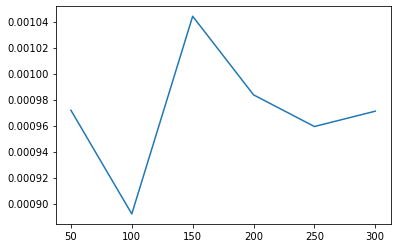

In [46]:
plt.plot(size,error_RATE)

plt.show()

### Different $N_T$ and initializations

In [47]:
error_test_w = [[]]*6
for s in range(len(size)):
    X_random_test = np.empty((size[s],1), dtype = object)
    N,p = X_random_test.shape
    for i in range(len(X_random_test)):
        X_random_test[i,0] = np.random.uniform(0,1,3)
    error_list = list()
    for p in range(len(W_list)):
        error_ = error_rate(X_random_test,W_list_g2[p],g_2)
        error_list.append(error_)
    error_test_w[s]=error_list

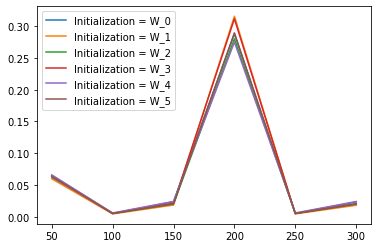

In [48]:
for p in range(len(error_test_w)):
    plt.plot(size, error_test_w[p], label=f"Initialization = W_{p}")

plt.legend()
plt.show()

For the entire part, all the things I've done for $g_1$ are the same but for another non linear function. Since I created function the only thing to change in my code is the arguments when I call my function. Instead $g_1$ I put $g_2$. For the rest, all the method are the same. We can also see that the results are almost the same. Same conclusion for the error with different initialization. For 200 samples there are some weird values

### Extra part

*$g_1 (X)$ for $x_3 = 1$*

In [49]:
def g_test(X):
    return(X[0]*X[1]+1)

In [50]:
x_axis = np.arange(-5,5,0.1)
y_axis = np.arange(-5,5,0.1)
xx_axis, yy_axis = np.meshgrid(x_axis, y_axis)
X_AXIS = [xx_axis, yy_axis]

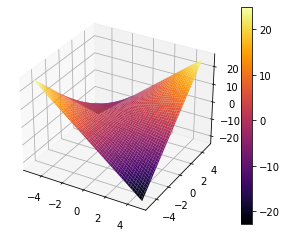

In [51]:
g = g_test(X_AXIS)
fig = plt.figure("Level map 3D")
ax3d = fig.gca(projection="3d")
surf = ax3d.plot_surface(xx_axis, yy_axis, g, cmap="inferno", edgecolor='none')
plt.colorbar(surf)
plt.show()

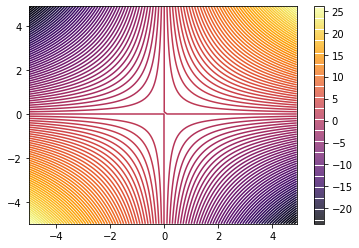

In [52]:
plt.figure("Level map 2D")
lm2D = plt.contour(x_axis, y_axis, g, 100, cmap="inferno")
plt.colorbar(lm2D)
plt.show()

*$g_2 (X)$ for $x_3 = 1$*

In [53]:
def g_test_2(X):
    return (X[0]**2+X[1]*1**2)

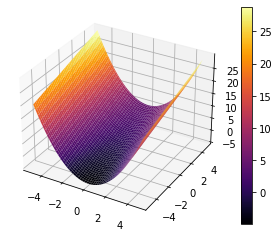

In [54]:
g2 = g_test_2(X_AXIS)
fig = plt.figure("Level map 3D")
ax3d = fig.gca(projection="3d")
surf = ax3d.plot_surface(xx_axis, yy_axis, g2, cmap="inferno", edgecolor='none')
plt.colorbar(surf)
plt.show()

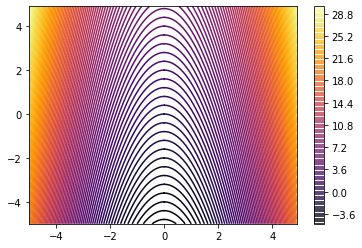

In [55]:
plt.figure("Level map 2D")
lm2D = plt.contour(x_axis, y_axis, g2, 100, cmap="inferno")
plt.colorbar(lm2D)
plt.show()

For this part I tried to plot the two g functions by the way I understood the subject.